# zfitter
zfit wrapper for lazy analysits [GitHub](https://github.com/mzks/zfitter)

Author: Keita Mizukoshi (Kobe Univ. mzks@stu.kobe-u.ac.jp, @mzks)

## Concept

 - Easy and less-typing
 - Visualization
 
[`zfit`](https://github.com/zfit/zfit) is a nice fitting tools on python, built on object-oriented interface.
However, I would sometime like to fit easily. I do *not always* want to care minimizers and cost function.
I usually take an approach for good fitting, try-error-retry with visual environment.
For that purpose, raw `zfit` is slightly much.
To prevent tenosynovitis of lazy analysts, I made a wrapper of `zfit`, `zfitter`

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# generate sample data
data = np.random.normal(11, 4, 10000)

In [4]:
import zfitter

In [5]:
zfitter.__version__

'0.1'

In [6]:
# Quick course 
zfitter.help()


    Welcome to zfitter!

    Fitting 4 steps on zfitter,

    Step 1 : Load data and make zfitter
    `zf = zfitter.zf(data)`

    Step 2 : Make model and initial parameters
    ```
    zf.set_model('gauss') 
    zf.set_parameter('mu', 11)
    zf.set_parameter('sigma', 3)
    ```
    or,
    ```
    from zfit import z
    def user_func(x, mu=10, sigma=1, C=1):
        return z.exp(-z.square((x - mu) / sigma)) + C
    zf.set_model_func(user_func)
    ```

    Step 3 : Visualize
    `zf.draw()`
    If it is not nice, tune parameters, then repeat step 2.

    Step 4 : Fit
    ```
    zf.fit()
    zf.draw()
    zf.result
    ```
    


### Step 1 : Load data and fitter (zf)

In [7]:
zf = zfitter.zf(data)

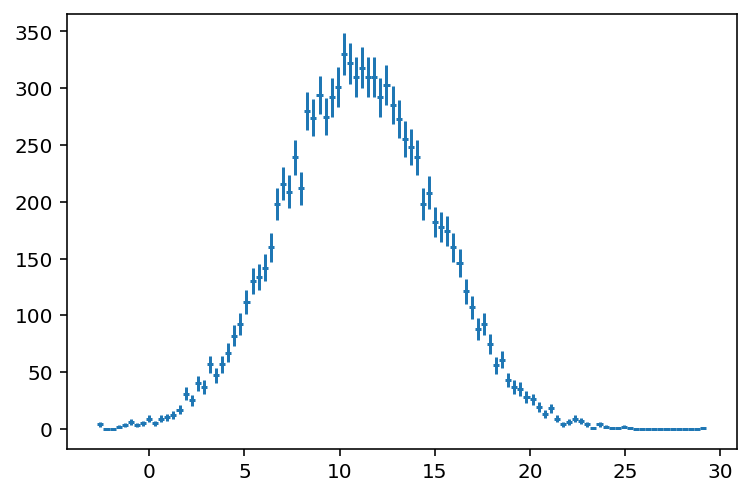

In [8]:
# If you want, number of bins and ranges can be set.
#zf.set_bins(200) # Number of bins
#zf.set_data_range(0, 25) # Range for data
#zf.set_range(5, 15) # Range for fitting

# Let's visualize! zfitter always provides `draw()` to visualize even before definition of model.
zf.draw()

### Model

In [9]:
zf.set_model('gauss') 
# I would like to use gaussian.
# This is a str-style to set model.
# It will support for other style (Object, str+str, ...), user will be able to find their model freely.
# User defined model with python function has been inplemented.

# By the way,... which parameters can be used? This method prints parameter list.

Parameters
mu : 0.0
sigma : 1.0


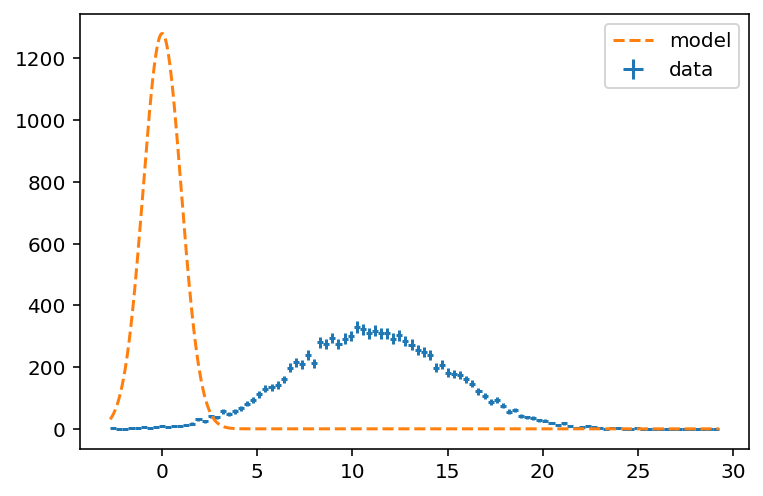

In [11]:
# Before fitting
zf.draw(); # Always can be used!
plt.legend()
# Even before fitting, analysts would like to draw data and model to find good model and initial parameters.

The initial valeues of the model is not good.
Set better values manually and re-draw.

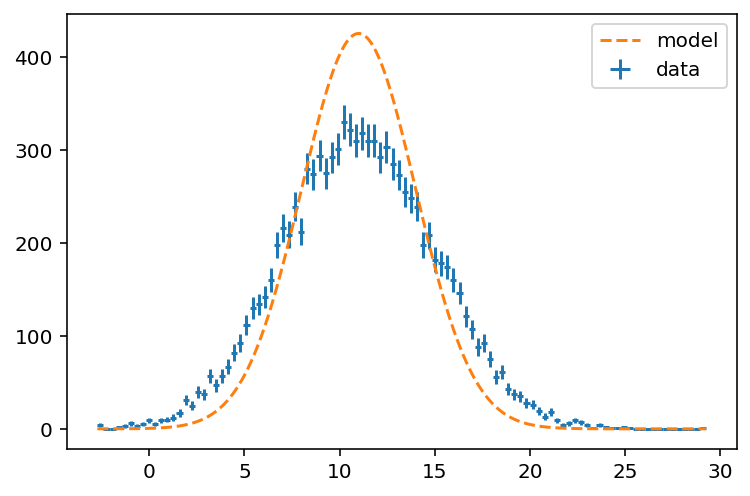

In [12]:
# In the real situation, this statements are written in the upper column, and run many times.
zf.set_parameter('mu', 11)
zf.set_parameter('sigma', 3)
zf.draw()
plt.legend()

# Issue: zfit doesn't provide way to overload Parameters themselves.
# The current zfitter doesn't support to set lower and upper limit, and step_size.

This is not perfect, but it is enough to fit. The rest work is fitter's one.
If you don't like the initial values, you can go back and re-set parameters.

In [13]:
zf.fit()

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.dist_tfp.Gauss'>  params=[mu, sigma]] data=[<zfit.core.data.Data object at 0x15686aa50>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 0.00018 │ -11.66      │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
mu        11.01       False
sigma     4.006       False

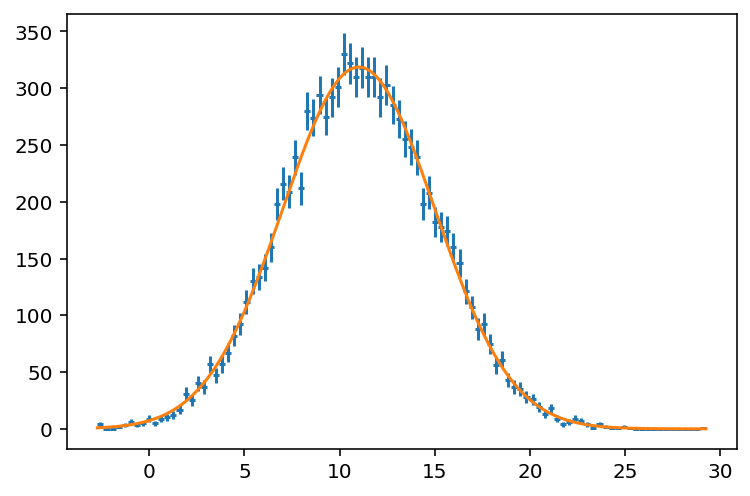

In [14]:
zf.draw()

It looks nice.

## User model

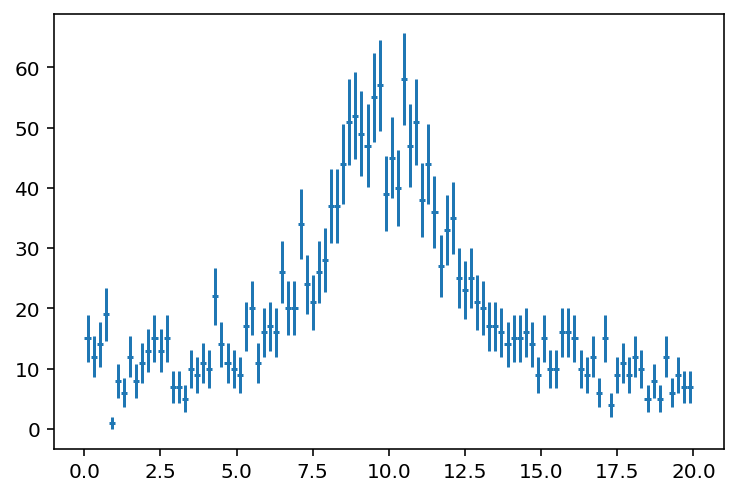

In [15]:
# Data is not on simple gaussian
signal = np.random.normal(10, 2, 1000)
background = np.random.uniform(0, 20, 1000)
data = np.concatenate([signal, background])
zf2 = zfitter.zf(data)
zf2.draw()

In [16]:
zfitter

<module 'zfitter' from '/Users/mzks/zfit_test/zfitter/zfitter/__init__.py'>

In [17]:
# User model as python function
from zfit import z
def user_func(x, mu=10, sigma=1, C=1): # These default arguments are used as initial parameters
    return z.exp(-z.square((x - mu) / sigma)) + C

zf2.set_model_func(user_func) # Only things user have to do is passing the function

Parameters
C : 1.0
mu : 10.0
sigma : 1.0


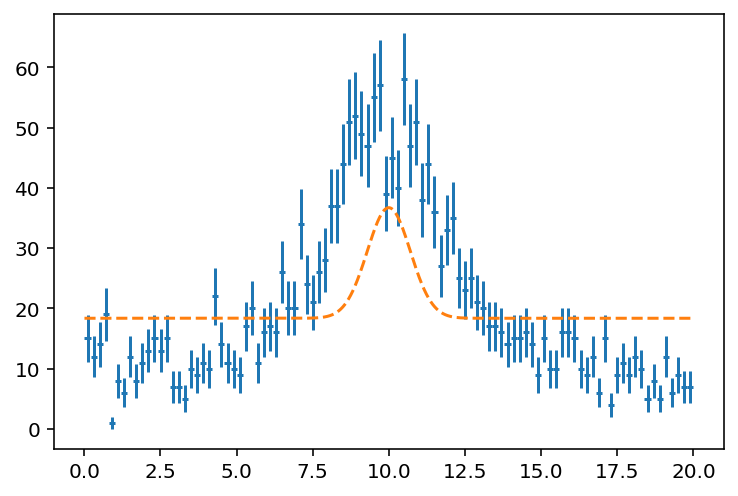

In [18]:
zf2.draw()

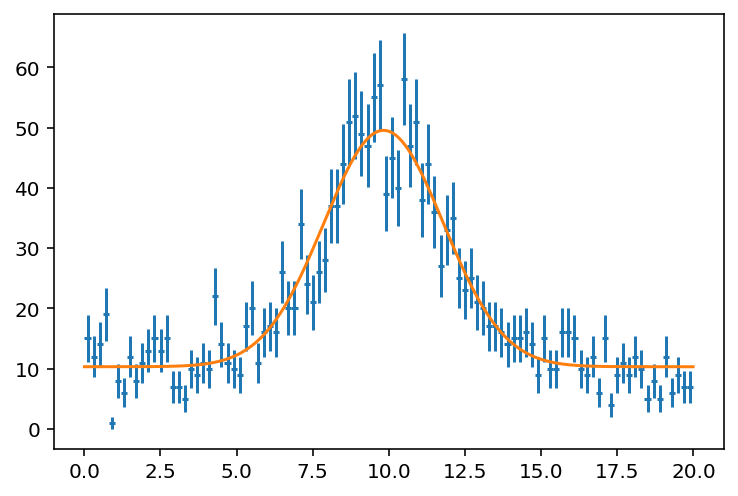

In [19]:
zf2.fit()
zf2.draw()

In [20]:
zf2.result

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfitter.core.zf.set_model_func.<locals>.UserPDF'>  params=[C, mu, sigma]] data=[<zfit.core.data.Data object at 0x156c1e790>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 0.00018 │ 767.9       │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
C        0.2627       False
mu        9.828       False
sigma      2.78       False